In [8]:
from salishsea_tools import viz_tools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import xarray as xr
import cmocean.cm as cm
from IPython import display

In [11]:
phys = xr.open_dataset('01mar23_05mar23/SalishSea_1h_20230301_20230305_grid_T.nc')

In [12]:
fw_trace = xr.open_dataset('01mar23_05mar23/SalishSea_1h_20230301_20230305_rivr_T.nc')

In [13]:
uvels = xr.open_dataset('01mar23_05mar23/SalishSea_1h_20230301_20230305_grid_U.nc')

In [14]:
vvels = xr.open_dataset('01mar23_05mar23/SalishSea_1h_20230301_20230305_grid_V.nc')

In [16]:
wvels = xr.open_dataset('01mar23_05mar23/SalishSea_1h_20230301_20230305_grid_W.nc')

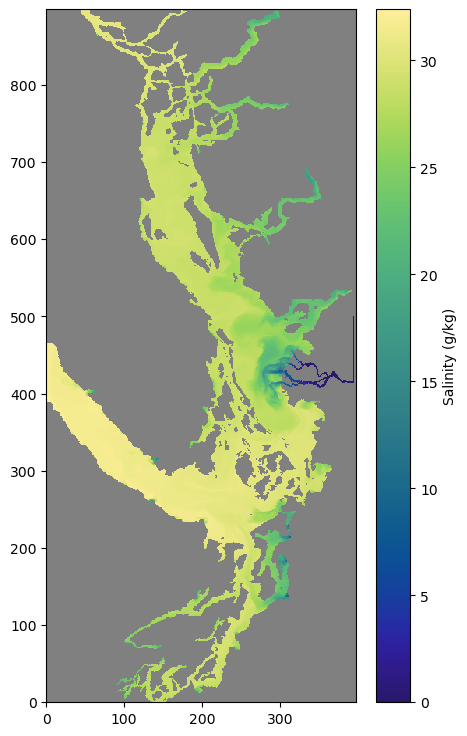

In [18]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

cmap = cm.haline
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys.vosaline[1, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity (g/kg)')

## Rivers

In [19]:
import salishsea_tools.river_202108 as rivers

In [20]:
def river_box(w_shed, r_call, box_side):
    river_idx = [rivers.prop_dict[w_shed][r_call]['i'], rivers.prop_dict[w_shed][r_call]['j']]
    river_range = [river_idx[0] - box_side, river_idx[0] + box_side, river_idx[1] - box_side, river_idx[1] + box_side]

    if (river_range[0] < 0):
        river_range[0] = 0
        river_range[1] = box_side*2

    if (898 - river_range[1] < 0):
        river_range[0] = 898-box_side*2
        river_range[1] = 898

    return river_range

In [21]:
box_size = 30
# order (CW starting under the Fraser): Nooksack, Skagit, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Salmon, Homathko, Squamish
Nooksack = river_box('fraser', 'Nooksack', box_size)
Skagit = river_box('skagit', 'Skagit1', box_size)
Snohomish = river_box('skagit', 'SnohomishAllenQuilceda', box_size)
Nisqually = river_box('puget', 'NisquallyMcAllister', box_size)
Elwha = river_box('jdf', 'Elwha', box_size)
Cowichan = river_box('evi_s', 'Cowichan1', box_size)
Nanaimo = river_box('evi_s', 'Nanaimo1', box_size)
Puntledge = river_box('evi_s', 'Puntledge', box_size)
Salmon = river_box('evi_n', 'SalmonSayward', box_size)
Homathko = river_box('bute', 'Homathko', box_size)
Squamish = river_box('howe', 'Squamish', box_size)

In [22]:
Puntledge

[624, 684, 90, 150]

(90.0, 150.0)

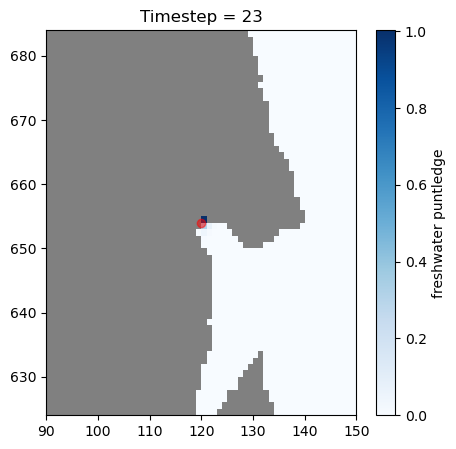

In [34]:
tstep = 23

cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
freshwater = np.ma.masked_array(fw_trace.puntledge_river[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(freshwater, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater puntledge')
ax.set_title('Timestep = {}'.format(str(tstep)))
ax.scatter(rivers.prop_dict['evi_s']['Puntledge']['j'],rivers.prop_dict['evi_s']['Puntledge']['i'],color='r', alpha = 0.5)
ax.set_ylim(Puntledge[0], Puntledge[1])
ax.set_xlim(Puntledge[2], Puntledge[3])

# ax.set_ylim(650, 750)
# ax.set_xlim(80, 180)

(105.0, 205.0)

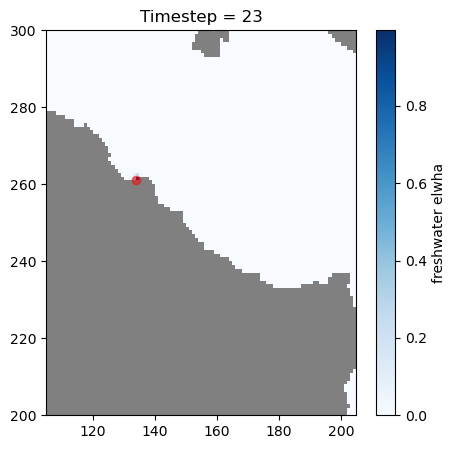

In [24]:
tstep = 23

cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
freshwater = np.ma.masked_array(fw_trace.elwha_river[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(freshwater, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater elwha')
ax.set_title('Timestep = {}'.format(str(tstep)))
ax.scatter(rivers.prop_dict['jdf']['Elwha']['j'],rivers.prop_dict['jdf']['Elwha']['i'],color='r', alpha = 0.5)
ax.set_ylim(Elwha[0], Elwha[1])
ax.set_xlim(Elwha[2], Elwha[3])

ax.set_ylim(200, 300)
ax.set_xlim(105, 205)

(180.0, 240.0)

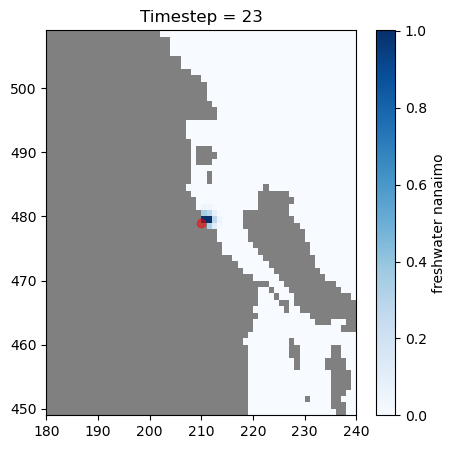

In [36]:
tstep = 23

cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
freshwater = np.ma.masked_array(fw_trace.nanaimo_river[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(freshwater, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater nanaimo')
ax.set_title('Timestep = {}'.format(str(tstep)))
ax.scatter(rivers.prop_dict['evi_s']['Nanaimo1']['j'],rivers.prop_dict['evi_s']['Nanaimo1']['i'],color='r', alpha = 0.5)
ax.set_ylim(Nanaimo[0], Nanaimo[1])
ax.set_xlim(Nanaimo[2], Nanaimo[3])

(105.0, 165.0)

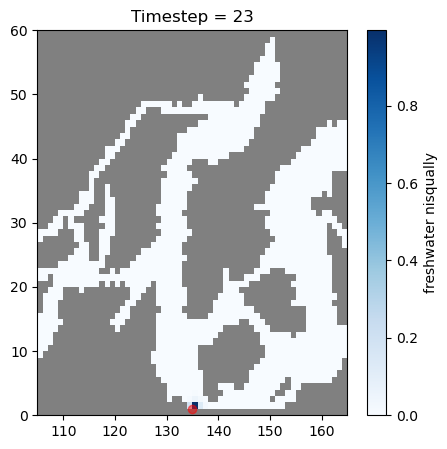

In [26]:
tstep = 23

cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
freshwater = np.ma.masked_array(fw_trace.nisqually_river[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(freshwater, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater nisqually')
ax.set_title('Timestep = {}'.format(str(tstep)))
ax.scatter(rivers.prop_dict['puget']['NisquallyMcAllister']['j'],rivers.prop_dict['puget']['NisquallyMcAllister']['i'],color='r', alpha = 0.5)
ax.set_ylim(Nisqually[0], Nisqually[1])
ax.set_xlim(Nisqually[2], Nisqually[3])

(354.0, 414.0)

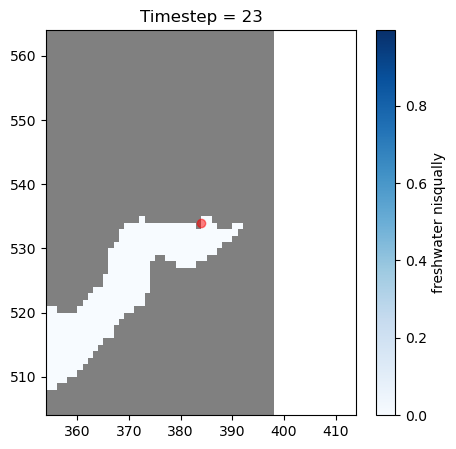

In [27]:
tstep = 23

cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
freshwater = np.ma.masked_array(fw_trace.nisqually_river[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(freshwater, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater nisqually')
ax.set_title('Timestep = {}'.format(str(tstep)))
ax.scatter(rivers.prop_dict['howe']['Squamish']['j'],rivers.prop_dict['howe']['Squamish']['i'],color='r', alpha = 0.5)
ax.set_ylim(Squamish[0], Squamish[1])
ax.set_xlim(Squamish[2], Squamish[3])

(368.0, 398.0)

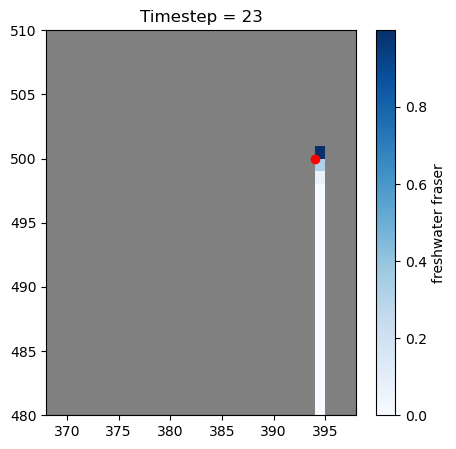

In [28]:
tstep = 23

cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
freshwater = np.ma.masked_array(fw_trace.fraser_river[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(freshwater, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater fraser')
ax.set_title('Timestep = {}'.format(str(tstep)))
ax.scatter(rivers.prop_dict['fraser']['Fraser']['j'],rivers.prop_dict['fraser']['Fraser']['i'],color='r')
ax.set_ylim(480, 510)
ax.set_xlim(368, 398)

Text(0.5, 1.0, 'Timestep = -1')

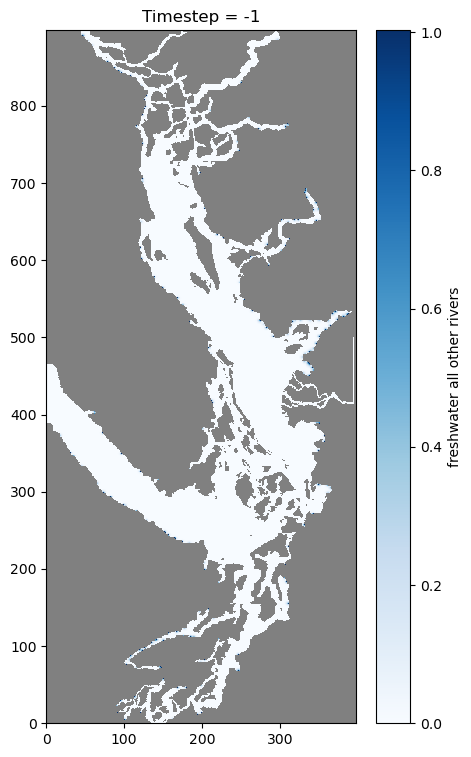

In [32]:
tstep = -1

cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
freshwater = np.ma.masked_array(fw_trace.other_rivers[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(freshwater, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater all other rivers')
ax.set_title('Timestep = {}'.format(str(tstep)))